# Object Classifier

## Overview

This document provides detailed information about the Object Classifier Model, including its architecture, training procedure, and usage guidelines.

## Introduction

The Object Classifier Model is designed to classify objects in images. It has been trained on a diverse dataset and can predict the category of objects within the specified classes.

## Model Architecture

The model architecture is based on Convulutional Neural Networks. The final layer uses softmax activation to output class probabilities.

## Dataset

The model has been trained on a dataset consisting of 11 classes(i.e objects). 

## Training Procedure

The model was trained using adam optimizer. Several training methods were tried starting with simple custom CNN to a more complex CNN and then with Data augmentation.

## Dependencies
This model relies on the following dependencies:

- TensorFlow
- NumPy

### Dependencies

In [31]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, utils
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

## Image Loading and Preprocessing

In [2]:
def load_and_preprocess_images(folder_path, label):
    images = []
    labels = []

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path).convert("RGB")  # To load image as RGB
        img_array = np.array(img)
        img_array = img_array / 255.0  # This normalizes pixel values to be between 0 and 1

        images.append(img_array)
        labels.append(label)
        
    return images, labels

In the next steps we are loading the images using the above defined function. We are loading the images in to a numpy array and along with its corresponding class. This will help us train the model.

In [3]:
class1_images, class1_labels = load_and_preprocess_images("/kaggle/input/mixed-images/mixed_images/Class_1 -Airplane", label="Airplane")

In [4]:
class2_images, class2_labels = load_and_preprocess_images("/kaggle/input/mixed-images/mixed_images/Class_2 - Cars", label="Car")

In [5]:
class3_images, class3_labels = load_and_preprocess_images("/kaggle/input/mixed-images/mixed_images/Class_3 - Birds", label="Bird")

In [6]:
class4_images, class4_labels = load_and_preprocess_images("/kaggle/input/mixed-images/mixed_images/Class_4 - Cats", label="Cat")

In [7]:
class5_images, class5_labels = load_and_preprocess_images("/kaggle/input/mixed-images/mixed_images/Class_5 - Deers", label="Deer")

In [8]:
class6_images, class6_labels = load_and_preprocess_images("/kaggle/input/mixed-images/mixed_images/Class_6 - Dogs", label="Dog")

In [9]:
class7_images, class7_labels = load_and_preprocess_images("/kaggle/input/mixed-images/mixed_images/Class_7 - Frogs", label="Frog")

In [10]:
class8_images, class8_labels = load_and_preprocess_images("/kaggle/input/mixed-images/mixed_images/Class_8 - Horses", label="Horse")

In [11]:
class9_images, class9_labels = load_and_preprocess_images("/kaggle/input/mixed-images/mixed_images/Class_9 - Ships", label="Ship")

In [12]:
class10_images, class10_labels = load_and_preprocess_images("/kaggle/input/mixed-images/mixed_images/Class_10 - Trucks", label="Truck")

In [13]:
class11_images, class11_labels = load_and_preprocess_images("/kaggle/input/mixed-images/mixed_images/Class_11 - Faces", label="Face")

### Concatinating

In the below code, we are joining all the images & classes together. 

In [14]:
all_images = np.array(class1_images + class2_images + class3_images + class4_images + class5_images + class6_images+class7_images+class8_images+class9_images+class10_images+class11_images)
all_labels = class1_labels + class2_labels + class3_labels + class4_labels+ class5_labels + class6_labels+class7_labels+class8_labels+class9_labels+class10_labels+class11_labels

### Encoding the labels

In [15]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(all_labels)

### Train & Test Split 

with ratio of 80 : 20

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    all_images, encoded_labels, test_size=0.2, random_state=42
)

### Model Architecture

The model architecture is a sequential neural network with 3 convolutional and 2 dense layers. 

#### Model Layers
##### Convolutional Layers:

- First Convolutional Layer: 32 filters, (3, 3) kernel size, ReLU activation.
- MaxPooling Layer: (2, 2) pool size.
- Second Convolutional Layer: 64 filters, (3, 3) kernel size, ReLU activation.- 
- MaxPooling Layer: (2, 2) pool size.
- Third Convolutional Layer: 64 filters, (3, 3) kernel size, ReLU activation.

- Flatten Layer: Flattens the input for the transition from convolutional layers to dense layers.

- Dense Layers:
    - First Dense Layer: 64 units, ReLU activation.
    - Second Dense Layer: 11 units (output classes), softmax activation.


In [54]:
simple_model = models.Sequential()

# Convolutional layers
simple_model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
simple_model.add(layers.MaxPooling2D((2, 2)))
simple_model.add(layers.Conv2D(64, (3, 3), activation="relu"))
simple_model.add(layers.MaxPooling2D((2, 2)))
simple_model.add(layers.Conv2D(64, (3, 3), activation="relu"))

# Flatten layer
simple_model.add(layers.Flatten())

# Dense layers
simple_model.add(layers.Dense(64, activation="relu"))
simple_model.add(layers.Dense(11, activation="softmax"))

simple_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [55]:
simple_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 1024)             

In [56]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [57]:
simple_model_history = simple_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
2753/2753 [==============================] - 14s 4ms/step - loss: 1.1495 - accuracy: 0.5932 - val_loss: 0.9299 - val_accuracy: 0.6769
Epoch 2/10
2753/2753 [==============================] - 11s 4ms/step - loss: 0.8201 - accuracy: 0.7126 - val_loss: 0.7596 - val_accuracy: 0.7343
Epoch 3/10
2753/2753 [==============================] - 11s 4ms/step - loss: 0.7037 - accuracy: 0.7570 - val_loss: 0.7350 - val_accuracy: 0.7446
Epoch 4/10
2753/2753 [==============================] - 11s 4ms/step - loss: 0.6304 - accuracy: 0.7796 - val_loss: 0.6926 - val_accuracy: 0.7624
Epoch 5/10
2753/2753 [==============================] - 11s 4ms/step - loss: 0.5815 - accuracy: 0.7974 - val_loss: 0.6242 - val_accuracy: 0.7869
Epoch 6/10
2753/2753 [==============================] - 11s 4ms/step - loss: 0.5387 - accuracy: 0.8111 - val_loss: 0.6196 - val_accuracy: 0.7919
Epoch 7/10
2753/2753 [==============================] - 11s 4ms/step - loss: 0.5054 - accuracy: 0.8223 - val_loss: 0.6270 - val_ac

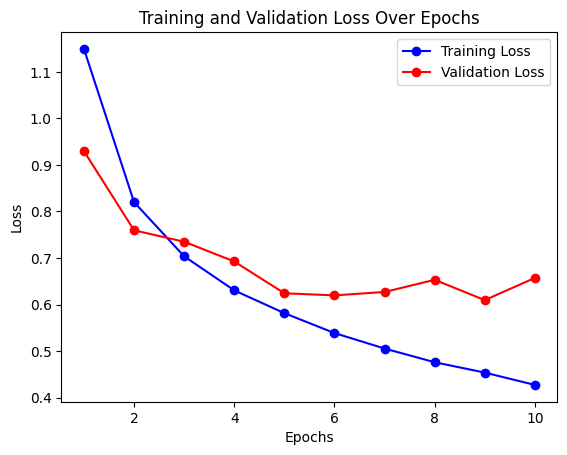

In [58]:
# Extract training and validation loss from the history
train_loss = simple_model_history.history['loss']
val_loss = simple_model_history.history['val_loss']

# Plotting the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


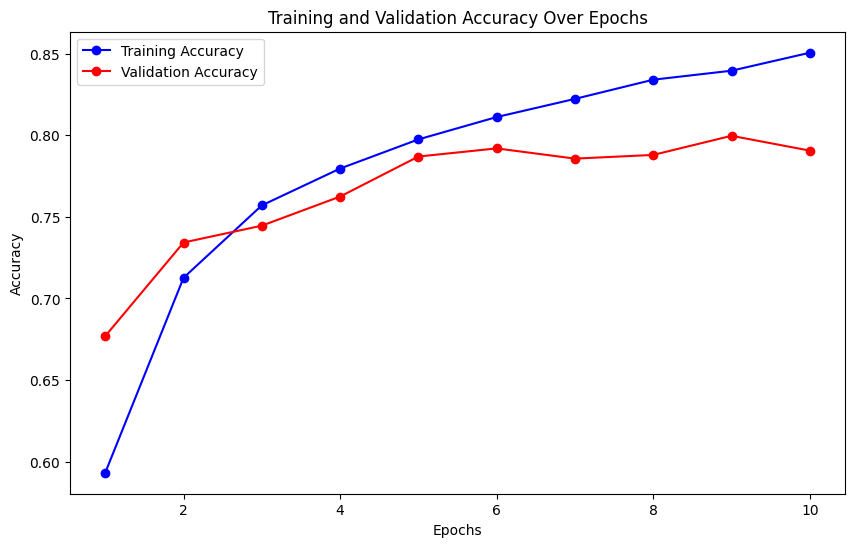

In [59]:

# Extract training and validation accuracy from the history
train_accuracy = simple_model_history.history['accuracy']
val_accuracy = simple_model_history.history['val_accuracy']

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

In [60]:
y_train_pred = simple_model.predict(X_train)
y_train_pred_binary = np.round(y_train_pred).astype(int)

y_train_original = label_encoder.inverse_transform(y_train)

# Assuming y_train_pred_binary is your one-hot encoded predictions
y_train_pred_class = np.argmax(y_train_pred_binary, axis=1)

# Convert back to original labels
y_train_pred_original = label_encoder.inverse_transform(y_train_pred_class)


print("Train Classification Report:")
print(classification_report(y_train_original, y_train_pred_original))


print("Train Confusion Matrix:")
print(confusion_matrix(y_train_original, y_train_pred_original))

2753/2753 [==============================] - 5s 2ms/step
Train Classification Report:
              precision    recall  f1-score   support

    Airplane       0.47      0.92      0.62      7971
        Bird       0.79      0.79      0.79      8019
         Car       0.89      0.95      0.92      8005
         Cat       0.81      0.72      0.76      7947
        Deer       0.92      0.78      0.84      7986
         Dog       0.87      0.67      0.76      7976
        Face       1.00      1.00      1.00      8067
        Frog       0.93      0.89      0.91      8006
       Horse       0.95      0.81      0.87      8004
        Ship       0.96      0.79      0.86      8093
       Truck       0.96      0.80      0.87      8006

    accuracy                           0.83     88080
   macro avg       0.87      0.83      0.84     88080
weighted avg       0.87      0.83      0.84     88080

Train Confusion Matrix:
[[7307  393   40   22    8    8    1   16   17  100   59]
 [1078 6364   29  1

In [61]:
y_pred = simple_model.predict(X_test)
y_pred_binary = np.round(y_pred).astype(int)

# Convert numerical labels back to original labels
y_test_original = label_encoder.inverse_transform(y_test)

y_test_pred_class = np.argmax(y_pred_binary, axis=1)

# Convert back to original labels
y_test_pred_original = label_encoder.inverse_transform(y_test_pred_class)

print("Test Classification Report:")
print(classification_report(y_test_original, y_test_pred_original))

# Generate a confusion matrix
print("TestConfusion Matrix:")
print(confusion_matrix(y_test_original, y_test_pred_original))

689/689 [==============================] - 1s 2ms/step
Test Classification Report:
              precision    recall  f1-score   support

    Airplane       0.42      0.86      0.56      2039
        Bird       0.69      0.72      0.70      1990
         Car       0.83      0.91      0.87      2004
         Cat       0.74      0.62      0.67      2062
        Deer       0.86      0.70      0.77      2023
         Dog       0.78      0.58      0.67      2033
        Face       0.99      1.00      0.99      1943
        Frog       0.88      0.85      0.86      2003
       Horse       0.89      0.74      0.81      2005
        Ship       0.90      0.72      0.80      1916
       Truck       0.91      0.73      0.81      2003

    accuracy                           0.76     22021
   macro avg       0.81      0.77      0.77     22021
weighted avg       0.81      0.76      0.77     22021

TestConfusion Matrix:
[[1749  147   27   11   10    4    0    6    5   54   26]
 [ 305 1430   11   37   

## After adding a little complexity in model

### Model Layers

##### Convolutional Layers:

- Multiple layers with 32, 64, and 128 filters, (3, 3) kernel size, ReLU activation.
- MaxPooling layers with (2, 2) pool size.

##### Flatten Layer:

- Flattens the input for the transition from convolutional layers to dense layers.

##### Dense Layers:

- Dense layers with 128 and 64 units, ReLU activation.
- Output Dense layer with 11 units (output classes), softmax activation.

In [47]:
complex_model = models.Sequential()

# Convolutional layers
complex_model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
complex_model.add(layers.MaxPooling2D((2, 2)))
complex_model.add(layers.Conv2D(64, (3, 3), activation="relu"))
complex_model.add(layers.MaxPooling2D((2, 2)))
complex_model.add(layers.Conv2D(128, (3, 3), activation="relu"))  # Additional convolutional layer
complex_model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer
complex_model.add(layers.Flatten())

# Dense layers
complex_model.add(layers.Dense(128, activation="relu"))  # Increased units
complex_model.add(layers.Dense(64, activation="relu"))
complex_model.add(layers.Dense(11, activation="softmax"))

complex_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [48]:
complex_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 2, 2, 128)        

In [49]:
complex_model_history = complex_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
2753/2753 [==============================] - 15s 5ms/step - loss: 1.1473 - accuracy: 0.5925 - val_loss: 0.8428 - val_accuracy: 0.7048
Epoch 2/10
2753/2753 [==============================] - 12s 4ms/step - loss: 0.7773 - accuracy: 0.7280 - val_loss: 0.7190 - val_accuracy: 0.7517
Epoch 3/10
2753/2753 [==============================] - 12s 4ms/step - loss: 0.6638 - accuracy: 0.7679 - val_loss: 0.6823 - val_accuracy: 0.7652
Epoch 4/10
2753/2753 [==============================] - 12s 4ms/step - loss: 0.5892 - accuracy: 0.7949 - val_loss: 0.6594 - val_accuracy: 0.7719
Epoch 5/10
2753/2753 [==============================] - 12s 4ms/step - loss: 0.5367 - accuracy: 0.8131 - val_loss: 0.6118 - val_accuracy: 0.7913
Epoch 6/10
2753/2753 [==============================] - 12s 4ms/step - loss: 0.4914 - accuracy: 0.8293 - val_loss: 0.6221 - val_accuracy: 0.7937
Epoch 7/10
2753/2753 [==============================] - 12s 4ms/step - loss: 0.4571 - accuracy: 0.8406 - val_loss: 0.5923 - val_ac

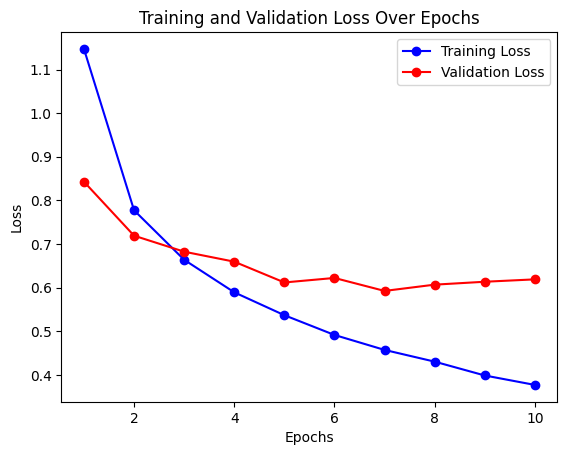

In [50]:
# Extract training and validation loss from the history
train_loss = complex_model_history.history['loss']
val_loss = complex_model_history.history['val_loss']

# Plotting the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


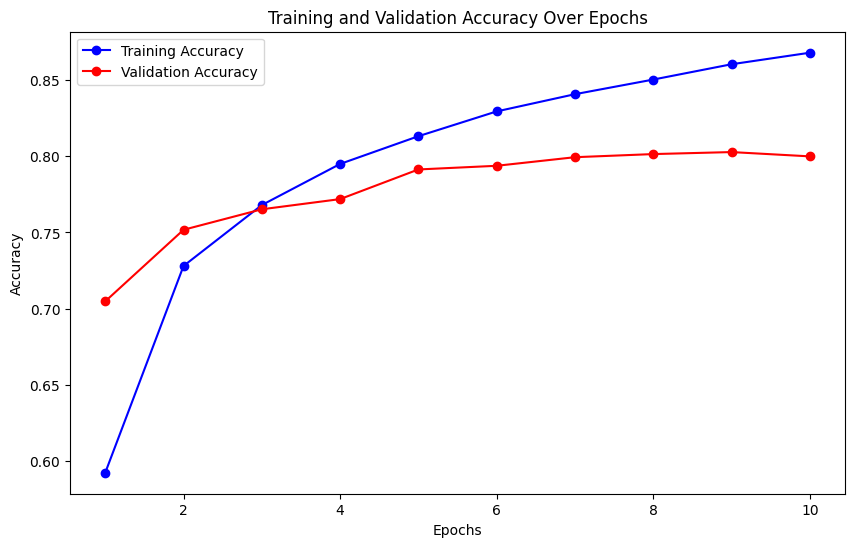

In [51]:

# Extract training and validation accuracy from the history
train_accuracy = complex_model_history.history['accuracy']
val_accuracy = complex_model_history.history['val_accuracy']

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

In [69]:
y_train_pred = complex_model.predict(X_train)
y_train_pred_binary = np.round(y_train_pred).astype(int)

y_train_original = label_encoder.inverse_transform(y_train)

# Assuming y_train_pred_binary is your one-hot encoded predictions
y_train_pred_class = np.argmax(y_train_pred_binary, axis=1)

# Convert back to original labels
y_train_pred_original = label_encoder.inverse_transform(y_train_pred_class)

print("Train Classification Report:")
print(classification_report(y_train_original, y_train_pred_original))

print("Train Confusion Matrix:")
print(confusion_matrix(y_train_original, y_train_pred_original))

2753/2753 [==============================] - 5s 2ms/step
Train Classification Report:
              precision    recall  f1-score   support

    Airplane       0.44      0.90      0.59      7971
        Bird       0.92      0.67      0.78      8019
         Car       0.94      0.91      0.93      8005
         Cat       0.83      0.67      0.74      7947
        Deer       0.90      0.79      0.84      7986
         Dog       0.85      0.72      0.78      7976
        Face       1.00      1.00      1.00      8067
        Frog       0.94      0.85      0.89      8006
       Horse       0.93      0.84      0.88      8004
        Ship       0.90      0.91      0.90      8093
       Truck       0.93      0.85      0.89      8006

    accuracy                           0.83     88080
   macro avg       0.87      0.83      0.84     88080
weighted avg       0.87      0.83      0.84     88080

Train Confusion Matrix:
[[7204  180   36   13   24    5    2   21   17  376   93]
 [1762 5371   16  1

In [70]:
y_pred = complex_model.predict(X_test)
y_pred_binary = np.round(y_pred).astype(int)

# Convert numerical labels back to original labels
y_test_original = label_encoder.inverse_transform(y_test)

y_test_pred_class = np.argmax(y_pred_binary, axis=1)

# Convert back to original labels
y_test_pred_original = label_encoder.inverse_transform(y_test_pred_class)

print("Test Classification Report:")
print(classification_report(y_test_original, y_test_pred_original))

# Generate a confusion matrix
print("TestConfusion Matrix:")
print(confusion_matrix(y_test_original, y_test_pred_original))

test_cm = confusion_matrix(y_test_original, y_test_pred_original)

689/689 [==============================] - 1s 2ms/step
Test Classification Report:
              precision    recall  f1-score   support

    Airplane       0.39      0.86      0.54      2039
        Bird       0.83      0.58      0.68      1990
         Car       0.89      0.85      0.87      2004
         Cat       0.75      0.58      0.66      2062
        Deer       0.84      0.72      0.77      2023
         Dog       0.77      0.64      0.70      2033
        Face       0.99      0.99      0.99      1943
        Frog       0.90      0.81      0.85      2003
       Horse       0.87      0.77      0.82      2005
        Ship       0.83      0.83      0.83      1916
       Truck       0.88      0.80      0.84      2003

    accuracy                           0.77     22021
   macro avg       0.81      0.77      0.78     22021
weighted avg       0.81      0.77      0.78     22021

TestConfusion Matrix:
[[1745   84   19    7    8    3    1    6    7  140   19]
 [ 500 1152    4   44   

We have tried to improve the simple CNN model by adding a couple of Convolutional layers and it did improve the accuracy by one percent.

Our next step is to implement the data augmentation.

In [ ]:
#model.save("ObjectClassifier.h5")

In [63]:
# Define other parameters
batch_size = 32
num_epochs = 10

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [64]:
simple_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [66]:
history = simple_model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
2753/2753 [==============================] - 53s 19ms/step - loss: 1.0259 - accuracy: 0.6498 - val_loss: 0.7234 - val_accuracy: 0.7595
Epoch 2/10
2753/2753 [==============================] - 50s 18ms/step - loss: 0.9298 - accuracy: 0.6805 - val_loss: 0.8123 - val_accuracy: 0.7366
Epoch 3/10
2753/2753 [==============================] - 50s 18ms/step - loss: 0.8931 - accuracy: 0.6926 - val_loss: 0.7576 - val_accuracy: 0.7546
Epoch 4/10
2753/2753 [==============================] - 50s 18ms/step - loss: 0.8632 - accuracy: 0.7048 - val_loss: 0.6926 - val_accuracy: 0.7697
Epoch 5/10
2753/2753 [==============================] - 50s 18ms/step - loss: 0.8479 - accuracy: 0.7081 - val_loss: 0.7119 - val_accuracy: 0.7601
Epoch 6/10
2753/2753 [==============================] - 51s 18ms/step - loss: 0.8326 - accuracy: 0.7134 - val_loss: 0.7388 - val_accuracy: 0.7505
Epoch 7/10
2753/2753 [==============================] - 51s 18ms/step - loss: 0.8219 - accuracy: 0.7182 - val_loss: 0.6978 -

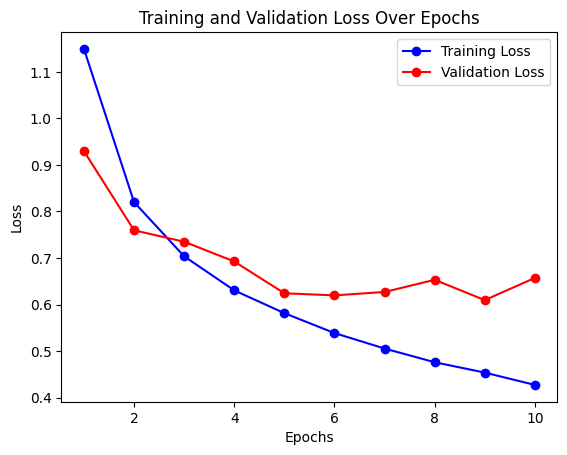

In [67]:
# Extract training and validation loss from the history
train_loss = simple_model_history.history['loss']
val_loss = simple_model_history.history['val_loss']

# Plotting the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


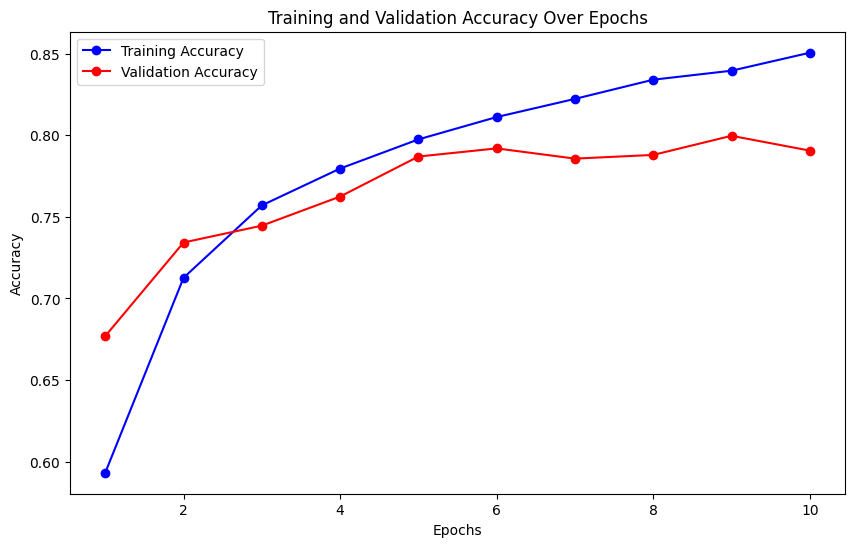

In [68]:

# Extract training and validation accuracy from the history
train_accuracy = simple_model_history.history['accuracy']
val_accuracy = simple_model_history.history['val_accuracy']

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

In [71]:
y_train_pred = simple_model.predict(X_train)
y_train_pred_binary = np.round(y_train_pred).astype(int)

y_train_original = label_encoder.inverse_transform(y_train)

# Assuming y_train_pred_binary is your one-hot encoded predictions
y_train_pred_class = np.argmax(y_train_pred_binary, axis=1)

# Convert back to original labels
y_train_pred_original = label_encoder.inverse_transform(y_train_pred_class)

print("Train Classification Report:")
print(classification_report(y_train_original, y_train_pred_original))

print("Train Confusion Matrix:")
print(confusion_matrix(y_train_original, y_train_pred_original))

2753/2753 [==============================] - 5s 2ms/step
Train Classification Report:
              precision    recall  f1-score   support

    Airplane       0.35      0.84      0.50      7971
        Bird       0.85      0.64      0.73      8019
         Car       0.89      0.88      0.89      8005
         Cat       0.88      0.47      0.62      7947
        Deer       0.87      0.71      0.78      7986
         Dog       0.84      0.58      0.69      7976
        Face       0.98      0.99      0.99      8067
        Frog       0.86      0.85      0.86      8006
       Horse       0.84      0.78      0.81      8004
        Ship       0.90      0.77      0.83      8093
       Truck       0.81      0.88      0.84      8006

    accuracy                           0.76     88080
   macro avg       0.83      0.76      0.77     88080
weighted avg       0.83      0.76      0.77     88080

Train Confusion Matrix:
[[6687  260   94    8   15    9    1   40  110  442  305]
 [2005 5101   32   

In [72]:
y_pred = simple_model.predict(X_test)
y_pred_binary = np.round(y_pred).astype(int)

# Convert numerical labels back to original labels
y_test_original = label_encoder.inverse_transform(y_test)

y_test_pred_class = np.argmax(y_pred_binary, axis=1)

# Convert back to original labels
y_test_pred_original = label_encoder.inverse_transform(y_test_pred_class)

print("Test Classification Report:")
print(classification_report(y_test_original, y_test_pred_original))

# Generate a confusion matrix
print("TestConfusion Matrix:")
print(confusion_matrix(y_test_original, y_test_pred_original))

test_cm = confusion_matrix(y_test_original, y_test_pred_original)

689/689 [==============================] - 1s 2ms/step
Test Classification Report:
              precision    recall  f1-score   support

    Airplane       0.35      0.84      0.49      2039
        Bird       0.82      0.62      0.70      1990
         Car       0.89      0.87      0.88      2004
         Cat       0.86      0.43      0.58      2062
        Deer       0.86      0.68      0.76      2023
         Dog       0.82      0.55      0.66      2033
        Face       0.98      1.00      0.99      1943
        Frog       0.85      0.85      0.85      2003
       Horse       0.83      0.77      0.80      2005
        Ship       0.89      0.76      0.82      1916
       Truck       0.81      0.88      0.84      2003

    accuracy                           0.75     22021
   macro avg       0.81      0.75      0.76     22021
weighted avg       0.81      0.75      0.76     22021

TestConfusion Matrix:
[[1719   74   29    4    5    0    1    6   19  103   79]
 [ 535 1227    9    8   

After trying above things, We can conclude that the complex model is performing better. 